In [75]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

### Read Bins lists input 

In [44]:
# read the info about all bins
all_bins = pd.read_excel('input/FINAL_all_bins_all_clusters.xlsx')

In [58]:
all_bins = all_bins[['recovered_genome', 'sample', 'secondary_cluster_x', 'part',
       'completeness', 'contamination', 'strain_heterogeneity', 'length',
       'N50', 'Bin_qual', 'bst_genome_1st_layer', 'genome', 'final_genomes']]
all_bins.head(2)

,recovered_genome,sample,secondary_cluster_x,part,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,bst_genome_1st_layer,genome,final_genomes
0,V00H9L_vamb.216248.fa,V00H9L,p6-487_1,p6,96.55,1.72,0.0,2439293,206313,HQ,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa
1,VEZUDR_vamb.198244.fa,VEZUDR,p6-487_1,p6,96.55,3.45,0.0,1903915,143532,HQ,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa,V00H9L_vamb.216248.fa


In [54]:
best1 = pd.read_excel('input/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa_with_binsNmb_m.xlsx')
best1 = best1[['best_cluster_genome', 'fastani_ani', 'closest_placement_reference',
       'closest_placement_ani', 'domain', 'phylum', 'class', 'order', 'family',
       'genus', 'sp', 'GTDBv214_taxa_notes', 'number_of_bins_per_HQcluster']]
best1.tail(2)

,best_cluster_genome,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,number_of_bins_per_HQcluster
2261,VE8VBP_maxbin.031.fa,NaN,NaN,NaN,Bacteria,Bacillota_A,Clostridia,Christensenellales,UBA1242,UBA7868,NaN,unknown_sp,NaN
2262,VC0JXP_31410.fa,NaN,NaN,NaN,Bacteria,Bacillota_A,Clostridia,Oscillospirales,CAG-272,UMGS911,NaN,unknown_sp,NaN


In [59]:
hq_clust = all_bins.merge(best1, left_on='recovered_genome', right_on='best_cluster_genome', how='left')
hq_clust = hq_clust.drop(['best_cluster_genome'], axis=1)
hq_clust.tail(2)

,recovered_genome,sample,secondary_cluster_x,part,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,...,closest_placement_ani,domain,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,number_of_bins_per_HQcluster
70494,VZOC83_vamb.17294.fa,VZOC83,p1-320_2,p1,98.28,0.0,0.0,2542883,128883,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70495,VZOC83_vamb.989.fa,VZOC83,p1-21_1,p1,98.28,0.0,0.0,1925701,67064,HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing bins for LQ clusterings

In [9]:
# read the list of missing bins (from first clustering)
missing_bins = pd.read_csv('input/missing_bins_list.csv')
missing_bins.tail(2)

,recovered_genome
15458,VZQLWU_vamb.295405.fa
15459,VZQLWU_vamb.332950.fa


In [6]:
# read the list of missing bins (from first clustering)
missing_bins = pd.read_csv('input/missing_bins_list.csv')

print('Number of bins in the first clustering:', len(all_bins))
print('Number of missing bins:', len(missing_bins))
print('Total number of bins:', len(all_bins) + len(missing_bins))

Number of bins in the first clustering: 70483
Number of missing bins: 15460
Total number of bins: 85943


### Merge list of missing genomes with clutering results

In [15]:
cdb = pd.read_csv('input/Cdb.csv')
cdb = cdb[['genome', 'primary_cluster','original_secondary_cluster', 'secondary_cluster']]
cdb['part'] = 'LQ_clusterings'
cdb['primary_cluster'] = 'LQ-'+cdb['primary_cluster'].astype(str)
cdb['secondary_cluster'] = 'LQ-'+cdb['secondary_cluster'].astype(str)
# read info about completeness and contamination
gen = pd.read_csv('input/genomeInformation.csv')
mrg = pd.merge(gen, cdb, on='genome', how='inner')
mrg.tail(2)


,genome,completeness,contamination,strain_heterogeneity,length,N50,centrality,primary_cluster,original_secondary_cluster,secondary_cluster,part
9472,VZSPJW_maxbin.036.fa,93.97,47.08,26.23,3167676,2880,0.963917,LQ-326,326_1,LQ-326_1,LQ_clusterings
9473,VZTMOW_vamb.164616.fa,67.63,0.00,0.00,1364300,30903,0.950937,LQ-738,738_2,LQ-738_1.2.3.4.5.9,LQ_clusterings


In [18]:
# Write stats
print('Number of bins passed filters to LQ clustering:', len(mrg), 'bins')
prc = str(len(mrg)/len(missing_bins)*100)[0:4]
print(prc,'%')
print('Nubmer of clusters in the LQ  clustering:', len(mrg['secondary_cluster'].unique()), 'clusters')

Number of bins passed filters to LQ clustering: 9474 bins
61.2 %
Nubmer of clusters in the LQ  clustering: 1644 clusters


In [92]:
miss_all_ClInfo = missing_bins.merge(mrg, left_on='recovered_genome', right_on='genome', how='left')
miss_all_ClInfo = miss_all_ClInfo.drop(['genome'], axis=1)
miss_all_ClInfo.tail(2)


,recovered_genome,sample,completeness,contamination,strain_heterogeneity,length,N50,centrality,primary_cluster,original_secondary_cluster,secondary_cluster,part,user_genome
15458,VZQLWU_vamb.295405.fa,VZQLWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15459,VZQLWU_vamb.332950.fa,VZQLWU,68.97,1.9,100.0,3415643.0,66170.0,0.958679,LQ-531,531_1,LQ-531_1.3,LQ_clusterings,VZQLWU_vamb.332950


In [98]:
print('Bins with LQ cluster results:', len(miss_all_ClInfo[miss_all_ClInfo['secondary_cluster'].notnull()]))

Bins with LQ cluster results: 9474


### Add GTDB results to LQ clustering results

In [19]:
ar = pd.read_csv('input/gtdbtk.ar53.summary.tsv', sep='\t')
ar = ar[['user_genome','classification','fastani_ani','closest_placement_reference','closest_placement_ani']]

ar['domain'] = ar['classification'].str.split(';', expand=True)[0].str.replace(r'd__', '')
ar['phylum'] = ar['classification'].str.split(';', expand=True)[1].str.replace(r'p__', '')
ar['class'] = ar['classification'].str.split(';', expand=True)[2].str.replace(r'c__', '')
ar['order'] = ar['classification'].str.split(';', expand=True)[3].str.replace(r'o__', '')
ar['family'] = ar['classification'].str.split(';', expand=True)[4].str.replace(r'f__', '')
ar['genus'] = ar['classification'].str.split(';', expand=True)[5].str.replace(r'g__', '')
ar['sp'] = ar['classification'].str.split(';', expand=True)[6].str.replace(r's__', '')
ar = ar.drop('classification', axis=1)

ar.tail()

,user_genome,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp
0,V61GT1_maxbin.144_sub,NaN,NaN,NaN,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,
1,VE7C2B_maxbin.163_sub,99.40,GCF_000016525.1,99.40,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
2,VMYG00_maxbin.064_sub,97.82,GCF_023617305.1,97.82,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii_A
3,VOMLT7_maxbin.029_sub,NaN,NaN,NaN,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,


In [21]:
# read taxonimy annotation for the best genomes from cluster
gt = pd.read_csv('input/gtdbtk.bac120.summary.tsv', sep='\t')
gt = gt[['user_genome','classification','fastani_ani','closest_placement_reference','closest_placement_ani']]

gt['domain'] = gt['classification'].str.split(';', expand=True)[0].str.replace(r'd__', '')
gt['phylum'] = gt['classification'].str.split(';', expand=True)[1].str.replace(r'p__', '')
gt['class'] = gt['classification'].str.split(';', expand=True)[2].str.replace(r'c__', '')
gt['order'] = gt['classification'].str.split(';', expand=True)[3].str.replace(r'o__', '')
gt['family'] = gt['classification'].str.split(';', expand=True)[4].str.replace(r'f__', '')
gt['genus'] = gt['classification'].str.split(';', expand=True)[5].str.replace(r'g__', '')
gt['sp'] = gt['classification'].str.split(';', expand=True)[6].str.replace(r's__', '')
gt = gt.drop('classification', axis=1)

gt.tail(2)


,user_genome,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp
1638,VZXIHP_vamb.46239,97.54,GCA_900543815.1,97.54,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,UBA4372,UBA4372 sp900543815
1639,VZZW6V_vamb.255038,97.15,GCA_900753975.1,97.15,Bacteria,Bacillota_A,Clostridia,TANB77,UBA1234,HGM13618,HGM13618 sp900753975


In [105]:
# Merge bacteria & archaea results
miss_best_taxa = pd.concat([gt, ar], ignore_index=True)
d = miss_all_ClInfo[['recovered_genome', 'secondary_cluster']].dropna()
d['recovered_genome'] = d['recovered_genome'].str.replace(r'.fa', '')
miss_best_taxa = miss_best_taxa.merge(d, left_on='user_genome', right_on='recovered_genome', how='left')
miss_best_taxa.drop('recovered_genome', axis=1, inplace=True)
miss_best_taxa.rename(columns={'user_genome':'final_genomes'}, inplace=True)
miss_best_taxa.tail(2)

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_34678/1999937258.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  d['recovered_genome'] = d['recovered_genome'].str.replace(r'.fa', '')


,user_genome,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp,recovered_genome,secondary_cluster
1642,VMYG00_maxbin.064_sub,97.82,GCF_023617305.1,97.82,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii_A,VMYG00_maxbin.064_sub,LQ-105_1
1643,VOMLT7_maxbin.029_sub,NaN,NaN,NaN,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,,VOMLT7_maxbin.029_sub,LQ-110_1


### Add info about taxa to all clustering missing genomes

In [111]:
# Combine GTDB and LQ clustering results
lq_clust = pd.merge(miss_all_ClInfo, miss_best_taxa, on='secondary_cluster', how='left')
lq_clust = lq_clust.drop(['centrality','user_genome','primary_cluster', 'original_secondary_cluster'], axis=1)

lq_clust.tail(2)

,recovered_genome,sample,completeness,contamination,strain_heterogeneity,length,N50,centrality,primary_cluster,original_secondary_cluster,...,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp
15458,VZQLWU_vamb.295405.fa,VZQLWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15459,VZQLWU_vamb.332950.fa,VZQLWU,68.97,1.9,100.0,3415643.0,66170.0,0.958679,LQ-531,531_1,...,98.95,GCF_002222615.2,98.95,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides caccae


In [122]:
lq_clust.tail(2)

,recovered_genome,sample,completeness,contamination,strain_heterogeneity,length,N50,secondary_cluster,part,final_genomes,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp
15458,VZQLWU_vamb.295405.fa,VZQLWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15459,VZQLWU_vamb.332950.fa,VZQLWU,68.97,1.9,100.0,3415643.0,66170.0,LQ-531_1.3,LQ_clusterings,VUR0YN_vamb.182603,98.95,GCF_002222615.2,98.95,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides caccae


In [123]:
# write the final table
lq_clust.to_excel('results/FINAL_all_LQ_clusters.xlsx', index=False)
#lq_clust = pd.read_excel('results/FINAL_LQ_clusters.xlsx')
#lq_clust.tail(2)    

In [124]:
lq_clust['domain'].value_counts()

Bacteria    9467
Archaea        7
Name: domain, dtype: int64

In [126]:
archaea = lq_clust[lq_clust['domain'] == 'Archaea']
archaea.to_excel('results/FINAL_archaea_LQ_clusters.xlsx', index=False)

## Combine HQ_clusters and LQ clusters 

In [132]:
lq_clust['Bin_qual'] = np.where(lq_clust['contamination'] > 10, 'LQ', np.where(lq_clust['contamination'].isna(), np.nan, 'MQ'))

hq_clust = hq_clust.drop(['genome'], axis=1)
hq_clust = hq_clust.rename(columns={'secondary_cluster_x':'secondary_cluster'})


In [139]:
# Columns present in HQ clustering but not in LQ clustering
# Need to add to LQ clustering!
set(hq_clust.columns) - set(lq_clust.columns)


{'GTDBv214_taxa_notes', 'bst_genome_1st_layer', 'number_of_bins_per_HQcluster'}

In [140]:
# Columns present in LQ clustering but not in HQ clustering
# Need to remove from HQ clustering!
set(lq_clust.columns) - set(hq_clust.columns)

set()

In [36]:
mrg[mrg['genome'] == 'V61GT1_maxbin.144_sub']

,genome,completeness,contamination,strain_heterogeneity,length,N50,centrality,primary_cluster,original_secondary_cluster,secondary_cluster,part
5129,V61GT1_maxbin.144_sub,75.91,40.02,5.17,8386253,1740,0.0,LQ-106,106_1,LQ-106_1,LQ_clusterings


In [38]:
pd.merge(mrg, ar, left_on='genome', right_on='user_genome', how='outer')

,genome,completeness,contamination,strain_heterogeneity,length,N50,centrality,primary_cluster,original_secondary_cluster,secondary_cluster,...,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp
0,V0404P_220966_sub,100.00,31.03,17.39,6538835,16643,0.936713,LQ-480,480_1,LQ-480_1.11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V04J9U_maxbin.011_sub,65.52,5.17,0.00,3295726,51249,0.960759,LQ-546,546_2,LQ-546_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V06SEH_maxbin.012,84.48,45.00,8.57,3462313,33650,0.931497,LQ-485,485_1,LQ-485_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V0874O_maxbin.098,61.21,36.73,8.70,1290518,2954,0.907603,LQ-806,806_1,LQ-806_1.4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V0APMK_maxbin.055_sub,98.28,27.59,0.00,4800814,62515,0.951860,LQ-342,342_1,LQ-342_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9469,VZMDR2_maxbin.015,72.57,11.21,10.00,2307960,6522,0.966396,LQ-367,367_1,LQ-367_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,VZMDR2_vamb.22282,71.55,1.72,0.00,1440066,168192,0.978533,LQ-419,419_1,LQ-419_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9471,VZR2LZ_vamb.278282,67.24,0.00,0.00,899993,41034,0.953235,LQ-225,225_1,LQ-225_1.2.5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9472,VZSPJW_maxbin.036,93.97,47.08,26.23,3167676,2880,0.963917,LQ-326,326_1,LQ-326_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#mrg['genome'] = mrg['genome'].str.replace(r'.fa', '')

allM = pd.merge(mrg, ar, left_on='genome', right_on='user_genome', how='inner')
allM = pd.merge(allM, gt, left_on='genome', right_on='user_genome', how='inner')

#allM['domain'].value_counts()
allM.head(2)

,genome,completeness,contamination,strain_heterogeneity,length,N50,centrality,primary_cluster,original_secondary_cluster,secondary_cluster,...,fastani_ani_y,closest_placement_reference_y,closest_placement_ani_y,domain_y,phylum_y,class_y,order_y,family_y,genus_y,sp_y


In [19]:
# read the info about the best genomes in cluster
bst = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes.xlsx')
# add info about 2nd clustering cluster
bst = bst.merge(clusters_info, left_on='best_cluster_genome', right_on='recovered_genome_name', how='left')
bst = bst.drop(['N','recovered_genome_name'], axis=1)
bst = bst.drop_duplicates()

#bst.to_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster.xlsx', index=False)
bst.head(2)

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_part,1st_clustering_cluster,1st_clustering_centrality,2nd_clustering_cluster
0,V00H9L_vamb.216248.fa,V00H9L,96.55,1.72,0.0,2439293,206313,HQ,p6,p6-487_1,0.971814,1737_1
1,V010T4_maxbin.052.fa,V010T4,98.28,0.00,0.0,2472853,81610,HQ,p9,p9-685_1,0.000000,1010_1


In [27]:
# add info about taxonomy to the best genomes in cluster
bst['genome'] = bst['best_cluster_genome'].str.replace(r'.fa', '')
bst = bst.merge(gt, left_on='genome', right_on='user_genome', how='left')

#bst.to_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa.xlsx', index=False)
#bst = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa.xlsx')
bst.head(2)

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_cluster,1st_clustering_centrality,...,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes
0,VLB6XN_256644.fa,VLB6XN,96.55,3.45,0.0,2869579,106856,HQ,p1-629_1,0.0,...,GCA_012519695.1,97.94,Bacteria,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp012519695,NaN
1,VDFRDM_metabat.13.fa,VDFRDM,89.66,0.00,0.0,3369048,49428,MQ,p5-586_1,0.0,...,GCA_934434905.1,95.51,Bacteria,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp934434905,NaN


In [28]:
# add info about number of bins in each cluster
clasters_number = all_bins['2nd_clustering_cluster'].value_counts().reset_index()
clasters_number.columns = ['cluster','number_of_bins']
clasters_number.head(2)

bst = bst.merge(clasters_number, left_on='2nd_clustering_cluster', right_on='cluster', how='left')
bst.to_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa_with_binsNmb.xlsx', index=False)

,cluster,number_of_bins
0,591_1,1216
1,671_1,1083


## Analisys

In [35]:
bst = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa_with_binsNmb_m.xlsx')
bst.head(2)


,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_cluster,1st_clustering_centrality,...,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes,2nd_clustering_cluster.1,number_of_bins_per_cluster,best_cluster_genome.1
0,VLB6XN_256644.fa,VLB6XN,96.55,3.45,0.0,2869579,106856,HQ,p1-629_1,0.0,...,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp012519695,NaN,1030_1,1.0,VLB6XN_256644.fa
1,VDFRDM_metabat.13.fa,VDFRDM,89.66,0.00,0.0,3369048,49428,MQ,p5-586_1,0.0,...,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp934434905,NaN,1347_1,2.0,VDFRDM_metabat.13.fa


In [46]:
bst['phylum'].value_counts()

# Bacillota = used tp be Firmicutes
# 

Bacillota_A          1216
Bacteroidota          337
Bacillota             212
Pseudomonadota        159
Cyanobacteriota        78
Actinomycetota         72
Verrucomicrobiota      58
Bacillota_C            45
Desulfobacterota       29
Campylobacterota       12
Spirochaetota          10
Bacillota_B            10
Elusimicrobiota         8
Fusobacteriota          7
Synergistota            5
Eremiobacterota         1
Bacillota_G             1
Fibrobacterota          1
Myxococcota             1
Patescibacteria         1
Name: phylum, dtype: int64

In [31]:
bst['genus'].value_counts()

Prevotella         56
Collinsella        41
Alistipes          29
Borkfalkia         28
CAG-269            27
                   ..
JAEDJI01            1
Intestinibacter     1
Holdemania          1
HGM16780            1
UMGS1474            1
Name: genus, Length: 714, dtype: int64

In [41]:
# explore the data
bst.groupby('phylum')['number_of_bins_per_cluster'].sum().reset_index().sort_values('number_of_bins_per_cluster', ascending=False)

,phylum,number_of_bins_per_cluster
2,Bacillota_A,34352.0
6,Bacteroidota,14527.0
1,Bacillota,4788.0
16,Pseudomonadota,4519.0
19,Verrucomicrobiota,2361.0
4,Bacillota_C,1414.0
8,Cyanobacteriota,1252.0
0,Actinomycetota,980.0
9,Desulfobacterota,834.0
10,Elusimicrobiota,89.0


In [27]:
# explore the data
bst.groupby('genus')['number_of_bins_per_cluster'].sum().reset_index().sort_values('number_of_bins_per_cluster', ascending=False)

,genus,number_of_bins_per_cluster
17,Alistipes,2370.0
404,Parabacteroides,1755.0
425,Prevotella,1445.0
393,Odoribacter,1276.0
10,Agathobacter,1249.0
...,...,...
581,UBA2821,1.0
584,UBA3210,1.0
327,Holdemania,1.0
323,Helicobacter_C,1.0


## Visualization

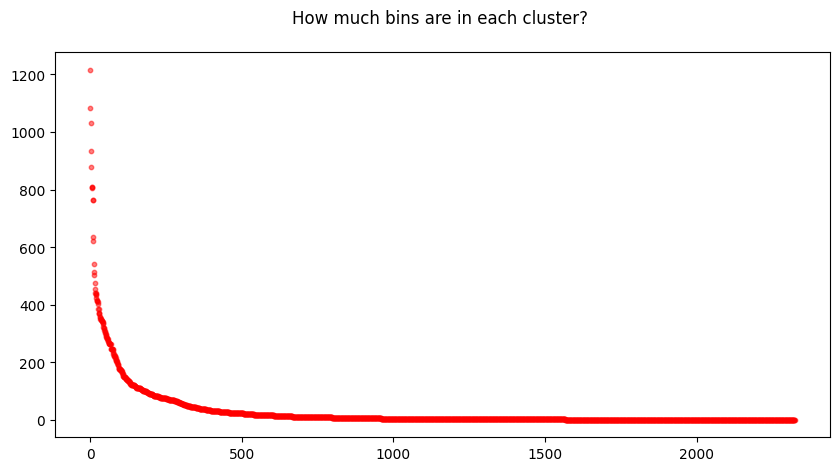

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(mrg.index, mrg1['bin_in_cluster'], s=10, alpha=0.5, color='red')

#plt.xticks(rotation=90)
#plt.xlabel('Secondary cluster')
#plt.ylabel('Number of bins per cluster')
plt.title('How much bins are in each cluster? \n')

plt.savefig('results/FINAL_clusters.png', dpi=300, bbox_inches='tight')

In [54]:
import plotly.express as px

fig = px.sunburst(
    mrg1,
    path=['phylum', 'class', 'order', 'family'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("Final_CLUSTRS_best.html")


/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur

In [25]:
bst['phylum'].value_counts()


Bacillota_A          1216
Bacteroidota          337
Bacillota             212
Pseudomonadota        159
Cyanobacteriota        78
Actinomycetota         72
Verrucomicrobiota      58
Bacillota_C            45
Desulfobacterota       29
Campylobacterota       12
Spirochaetota          10
Bacillota_B            10
Elusimicrobiota         8
Fusobacteriota          7
Synergistota            5
Eremiobacterota         1
Bacillota_G             1
Fibrobacterota          1
Myxococcota             1
Patescibacteria         1
Name: phylum, dtype: int64

In [26]:
bst['genus'].value_counts().head(20)

Prevotella           56
Collinsella          41
Alistipes            29
Borkfalkia           28
CAG-269              27
Vescimonas           26
Faecousia            25
Bacteroides          23
Stercorousia         22
Haemophilus_D        22
Cryptobacteroides    21
Phocaeicola          20
Dysosmobacter        20
UBA737               19
CAG-485              17
Blautia_A            17
UBA10281             16
UBA1259              15
Eubacterium_R        15
CAG-873              15
Name: genus, dtype: int64

In [53]:
bst.columns

Index(['best_cluster_genome', 'sample_name', 'completeness', 'contamination',
       'strain_heterogeneity', 'length', 'N50', 'Bin_qual',
       '1st_clustering_cluster', '1st_clustering_centrality',
       '2nd_clustering_cluster', 'fastani_ani', 'closest_placement_reference',
       'closest_placement_ani', 'domain', 'phylum', 'class', 'order', 'family',
       'genus', 'sp', 'GTDBv214_taxa_notes', '2nd_clustering_cluster.1',
       'number_of_bins_per_cluster', 'best_cluster_genome.1'],
      dtype='object')

In [77]:
import plotly.express as px

fig = px.scatter(
    bst,
    x='completeness',
    y='contamination',
    color='phylum',
    #size='number_of_bins_per_cluster',
    title='Scatterplot: Completeness vs Contamination',
    labels={
        'completeness': 'Completeness',
        'contamination': 'Contamination',
        'phylum': 'Phylum',
        'number_of_bins_per_cluster': 'Number of Bins per Cluster'
    },
)

fig.show()



In [80]:
mrg2.columns

Index(['best_cluster_genome', 'sample_name', 'completeness', 'contamination',
       'strain_heterogeneity', 'length', 'N50', 'Bin_qual',
       '1st_clustering_cluster', '1st_clustering_centrality',
       '2nd_clustering_cluster', 'fastani_ani', 'closest_placement_reference',
       'closest_placement_ani', 'domain', 'phylum', 'class', 'order', 'family',
       'genus', 'sp', 'GTDBv214_taxa_notes', '2nd_clustering_cluster.1',
       'number_of_bins_per_cluster', 'best_cluster_genome.1'],
      dtype='object')

In [34]:
df = bst[bst['genus'] == 'Collinsella']

In [39]:
df = bst[bst['genus'] == 'Collinsella']
df = df[df['number_of_bins_per_cluster'] > 12]
df['number_of_bins_per_cluster_str'] = df['number_of_bins_per_cluster'].astype(str)
df['bin_info'] = df['Bin_qual'] + ' ' + df['number_of_bins_per_cluster_str']


fig = px.sunburst(
    df,
    path=['genus', 'sp','bin_info'],
    values='number_of_bins_per_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",   
    width=750, 
    height=750
)

fig.write_html("taxa_results/Final_CLUSTRS_best_Collinsella.html")
fig.show()

ValueError: ('None entries cannot have not-None children', genus       Collinsella
sp                  nan
bin_info        HQ 13.0
Name: 1, dtype: object)

In [81]:
mrg3 = mrg1[mrg1['bin_in_cluster'] > 18]

fig = px.sunburst(
    mrg3,
    path=['class', 'order', 'family', 'genus', 'sp'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("taxa_results/Final_CLUSTRS_best_prev1.html")
fig.show()

NameError: name 'mrg1' is not defined